In [53]:
# Import libraries

from gensim.models import doc2vec
from collections import namedtuple
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [45]:
############### Change values here ###############

# Load data

docs_original = [
    "That item is mine.",
    "He stepped on a mine.",
    "She found gold in a mine.",
    "That gold is mine.",
    "She found it in a mine.",
    "He stepped in a mine."
]

# Doc2Vec hyper parameters

size = 3 # dimension of the hidden layer (default: 100)
window = 300 # max distance between the predicted word and context words (default: 5)
min_count = 1 # ignore all words with total frequency lower than this (default: 5)

##################################################

In [46]:
# Transform data (you can add more data preprocessing steps) 

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(docs_original):
    words = text.lower().replace('.','').split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

In [49]:
# Train model 

model = doc2vec.Doc2Vec(docs, size = size, window = window, min_count = min_count)

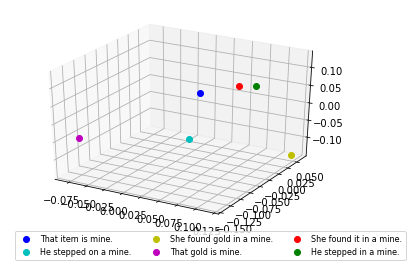

In [56]:
# Visualize

if size == 2:

    xs=[]
    ys=[]
    for docvec in model.docvecs:
        xs.append(docvec[0])
        ys.append(docvec[1])

    colors = ['b', 'c', 'y', 'm', 'r', 'g']
    scatters = set()
    for x,y,c in zip(xs,ys,colors):
        print(x,y,c)
        scatters.add(plt.scatter(x, y, marker='o', color=c))

    plt.legend(scatters,
               set(docs_original),
               scatterpoints=1,
               bbox_to_anchor=(1.04,1),
               ncol=3,
               fontsize=8
              )

    plt.show()
elif size == 3:
    xs=[]
    ys=[]
    zs=[]
    for docvec in model.docvecs:
        xs.append(docvec[0])
        ys.append(docvec[1])
        zs.append(docvec[2])

    colors = ['b', 'c', 'y', 'm', 'r', 'g']
    ax = plt.subplot(111, projection='3d')
    
    scatters = set()
    for x,y,z,c,doc in zip(xs,ys,zs,colors,docs_original):
        ax.plot([x],[y],[z],'o', color=c, label=doc)

    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0))
    plt.show()